# <center>K Nearest Neighbor<center>
**<div align=right>Made by:</div>**
<div align=right>Ihor Markevych</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv('knnData.csv')

Let's see how our data looks like:

In [3]:
data.head()

,trainPoints_x1,trainPoints_x2,trainLabel,testPoints_x1,testPoints_x2,testLabel
0,1.947005,4.256560,-1,-1.888977,-4.622611,1
1,0.794931,3.556851,-1,4.233796,3.851680,1
2,-0.264977,2.128280,-1,-0.697926,4.132868,-1
3,-1.555300,0.408163,-1,-3.151837,2.961839,-1
4,-0.956221,-0.991254,-1,4.048810,-4.012877,1


Split it into train and test $X$ and $y$.

In [4]:
trainX = data[['trainPoints_x1', 'trainPoints_x2']]
trainY = data['trainLabel']

testX = data[['testPoints_x1', 'testPoints_x2']]
testY = data['testLabel']

## Visualization

### Train data

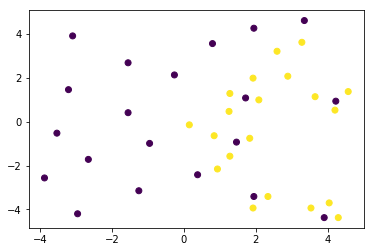

In [5]:
plt.scatter(trainX.iloc[:,0], trainX.iloc[:,1], c=trainY)
plt.show()

### Test data

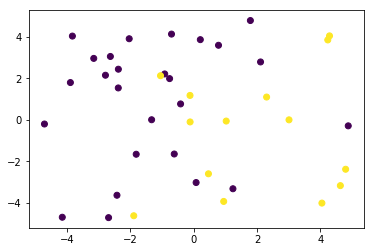

In [6]:
plt.scatter(testX.iloc[:,0], testX.iloc[:,1], c=testY)
plt.show()

## Weighted kNN

### Norms

In [7]:
def l2Norm(x, y):
    x = np.array(x)
    y = np.array(y)
    return (sum((x - y) ** 2)) ** 0.5
#     return np.linalg.norm(np.array(x) - np.array(y))

In [8]:
def l1Norm(x, y):
    x = np.array(x)
    y = np.array(y)
    return sum(abs(x - y))
#     return np.linalg.norm(np.array(x) - np.array(y), ord=1)

In [9]:
def lInfNorm(x, y):
    x = np.array(x)
    y = np.array(y)
    return max(abs(x - y))
#     return np.linalg.norm(np.array(x) - np.array(y), ord=np.inf)

Next function defines weights to be used.

In [38]:
def weights(distances):
    return np.array([1 / d ** 2 for d in distances])

### Custom kNN

In [11]:
def predictWeightedKNN(trainX, trainY, testXPoint, k, distance=l2Norm, weights=weights):
    
#     get vector of distances
    distances = np.array([distance(trainXPoint, testXPoint) ** 2 for _, trainXPoint in trainX.iterrows()])
#    convert it into weights
    w = weights(distances)
    
#     get vector of indices of closest neighbors
    neighborsIndixes = np.argpartition(distances, k)[:k]
    
#     get pairs of label - quantity of points with this label
    neighbors = trainY[neighborsIndixes].value_counts()

#     get weights for weighted average
    w = [sum(w[neighborsIndixes][[ind for ind in trainY[neighborsIndixes] == label]]) 
               for label in neighbors.index.values] # neighbors.index.values

#     apply them (formally speaking, we also need to divide by sum(w), but for classification problem we can ignore that)
    neighbors = neighbors * w
    
    
#     when there are equal probabilities for several labels function will return random from them     
    return neighbors[neighbors == np.max(neighbors)].index.values \
                [np.random.randint(0, len(neighbors[neighbors == np.max(neighbors)]))]

(For this particular dataset we can implement kNN easier by simply taking weighted sum of labels of neighbors and checking for sign, but we will go with more general solution).

In [12]:
def accuracyForNorm(norm):
    acc = 0
    for i in range(len(testY)):
        acc += predictWeightedKNN(trainX, trainY, testX.iloc[i], 3, norm) == testY[i]
    return acc / len(testY)

In [13]:
print(f'Accuracy of custom kNN for L2 norm is {accuracyForNorm(l2Norm)}.')

Accuracy of custom kNN for L2 norm is 0.825.


In [14]:
print(f'Accuracy of custom kNN for L1 norm is {accuracyForNorm(l1Norm)}.')

Accuracy of custom kNN for L1 norm is 0.875.


In [15]:
print(f'Accuracy of custom kNN for L-Inf norm is {accuracyForNorm(lInfNorm)}.')

Accuracy of custom kNN for L-Inf norm is 0.875.


-------

### sklearn kNN

Rechecking using sklearn KNeighborsClassifier.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

Note: if instead of `weights` we will set `'distance'` analoguous weights will be used, but without squaring.

In [17]:
sklearnKNNL2 = KNeighborsClassifier(3, weights=weights, metric=l2Norm)
sklearnKNNL2.fit(trainX, trainY)
predY = sklearnKNNL2.predict(testX)

print('\033[1m3-NN for L2 norm:\033[0m')
print(f'Accuracy score is {accuracy_score(testY, predY)}.')
print(f'Recall score is {recall_score(testY, predY)}.')
print(f'Confusion matrix is:')
print(confusion_matrix(testY, predY))

3-NN for L2 norm:
Accuracy score is 0.825.
Recall score is 0.7142857142857143.
Confusion matrix is:
[[23  3]
 [ 4 10]]


In [18]:
sklearnKNNL1 = KNeighborsClassifier(3, weights=weights, metric=l1Norm)
sklearnKNNL1.fit(trainX, trainY)
predY = sklearnKNNL1.predict(testX)

print('\033[1m3-NN for L1 norm:\033[0m')
print(f'Accuracy score is {accuracy_score(testY, predY)}.')
print(f'Recall score is {recall_score(testY, predY)}.')
print(f'Confusion matrix is:')
print(confusion_matrix(testY, predY))

3-NN for L1 norm:
Accuracy score is 0.875.
Recall score is 0.7857142857142857.
Confusion matrix is:
[[24  2]
 [ 3 11]]


In [19]:
sklearnKNNLInf = KNeighborsClassifier(3, weights=weights, metric=lInfNorm)
sklearnKNNLInf.fit(trainX, trainY)
predY = sklearnKNNLInf.predict(testX)

print('\033[1m3-NN for L-Inf norm:\033[0m')
print(f'Accuracy score is {accuracy_score(testY, predY)}.')
print(f'Recall score is {recall_score(testY, predY)}.')
print(f'Confusion matrix of kNN for L-Inf norm is:')
print(confusion_matrix(testY, predY))

3-NN for L-Inf norm:
Accuracy score is 0.875.
Recall score is 0.7857142857142857.
Confusion matrix of kNN for L-Inf norm is:
[[24  2]
 [ 3 11]]


### Voronoi diagrams

Next function plots Voronoi diagram by predicting value for each meshgrid.

In [20]:
def plotVoronoi(d, labels, model, ax=None):
#     https://stackoverflow.com/questions/52054491/matplotlib-how-to-return-a-matplotlib-object-then-plot-as-subplot
    ax = ax or plt.gca()
    
    h = 0.05
    
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

    x_min, x_max = d.iloc[:,0].min() - 1, d.iloc[:,0].max() + 1
    y_min, y_max = d.iloc[:,1].min() - 1, d.iloc[:,1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolor(xx, yy, Z, cmap = cmap_light)
    
    # Plot also the training points
    ax.scatter(d.iloc[:,0], d.iloc[:,1], c = colormap[labels], s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax.set_title(model.metric.__name__)
    return fig

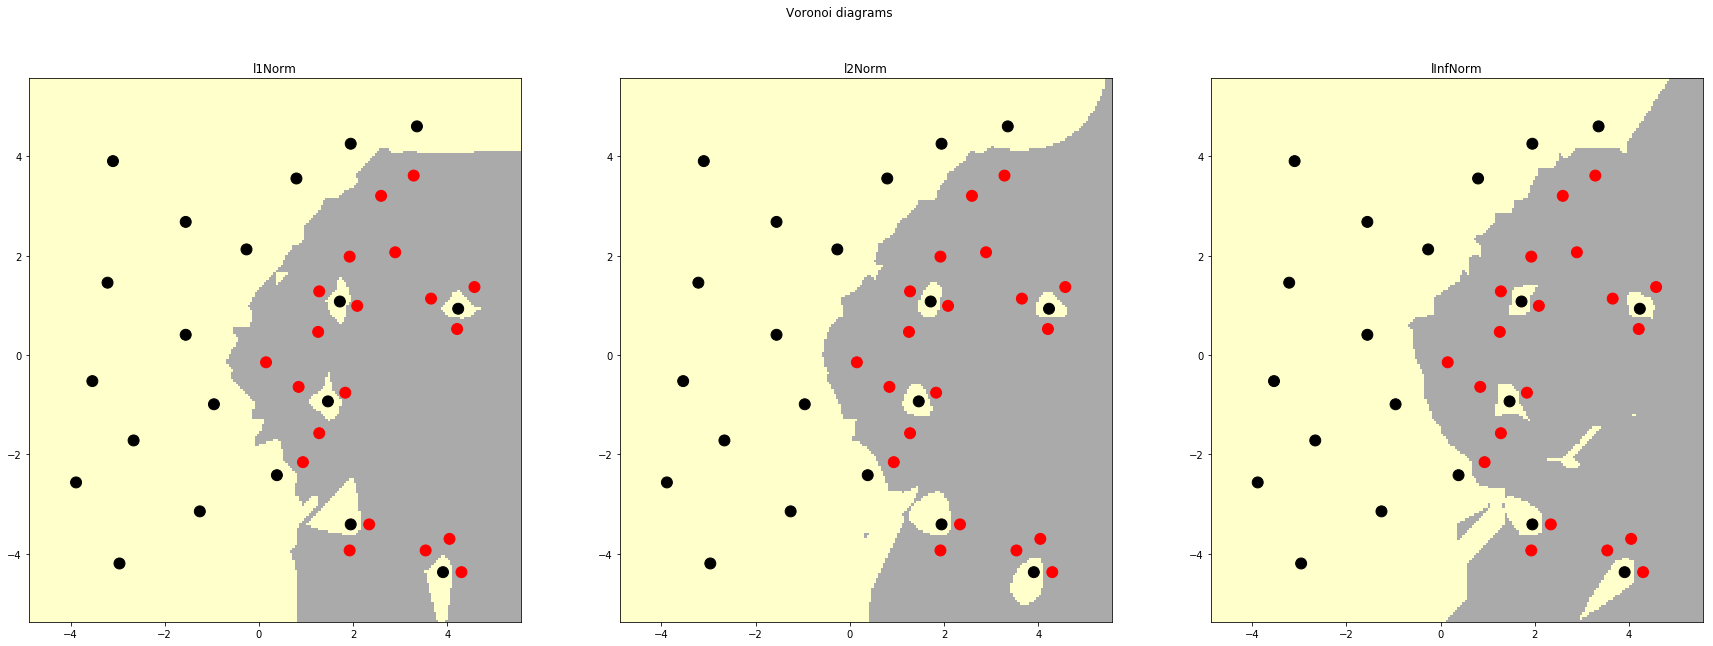

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 10))
fig.suptitle('Voronoi diagrams')
plotVoronoi(trainX, trainY, sklearnKNNL1, ax1)
plotVoronoi(trainX, trainY, sklearnKNNL2, ax2)
plotVoronoi(trainX, trainY, sklearnKNNLInf, ax3)
plt.show()

## Conclusion

For this particular dataset L1 and L-Inf gives best results with accuracy of 87.5%, while L2 norm gives worst results with accuracy of 82.5%. We can see differences in decision borders on Voronoi diagrams.

In [73]:
class kNN:
    def distance(val1, val2):
    
#         val1Num = val1.select_dtypes(include='number')
#         val2Num = val2.select_dtypes(include='number')

#         dist = np.linalg.norm(np.array(val1Num) - np.array(val2Num), axis=1) ** 2

#         val1Cat = val1.select_dtypes(include='object')
#         val2Cat = val2.select_dtypes(include='object')

#         catInds = val1Cat.notnull()
#         catInds = catInds.index.values[catInds]
#         val1CatVals = val1Cat[catInds]
#         val2CatVals = val2Cat[catInds]
#         vdm = VDM()

#         for x1, x2, i in zip(val1CatVals, val2CatVals, catInds):
#             dist += VDM(x1, x2, X[i], y)

#         return dist ** 0.5

        return np.linalg.norm(np.array(val1) - np.array(val2))
    
    def __init__(self, k, weights=weights):
        self.k = k
#         self.distance = distance
        self.weights = weights
        
    def fit(self, trainX, trainY):
        self.trainX = trainX
        self.trainY = trainY
    
    def predictOnePoint(self, testXPoint):
    #     get vector of distances
        distances = (np.sum((np.array(self.trainX) - np.array(testXPoint)) ** 2, axis=1))
    #     get vector of indices of closest neighbors
        neighborsIndexes = np.argpartition(distances, self.k)[:self.k]
        
    #    convert distances into weights
        w = weights(distances)
   
    #     get pairs of label - quantity of points with this label
        neighbors = self.trainY[neighborsIndexes].value_counts()

    #     get weights for weighted average
        w = [sum(w[neighborsIndexes][[ind for ind in trainY[neighborsIndexes] == label]]) 
                   for label in neighbors.index.values]

    #     apply them (formally speaking, for regression we also need to divide by sum(w), 
    #           but for classification problem we can ignore that)
        neighbors = neighbors * w

    #     when there are equal probabilities for several labels function will return first from them 
        labels = neighbors[neighbors == np.max(neighbors)]
        return labels.index.values[0]
#     [np.random.randint(0, len(labels))]

    def predict(self, testX):
        return testX.apply(self.predictOnePoint, axis=1)

In [74]:
def weights22(distances):
    with np.errstate(divide='ignore'):
        return np.float64(1) / distances ** 2

In [75]:
knn = kNN(3)
knn.fit(trainX, trainY)
accuracy_score(testY, knn.predict(testX))

0.825

In [34]:
sklearnKNNL1 = KNeighborsClassifier(3, weights=weights)
sklearnKNNL1.fit(trainX, trainY)
predY = sklearnKNNL1.predict(testX)
accuracy_score(testY, predY)

0.825